# Parallel Processing of Wine Review Data**

## Objective

Can we recreate this $5$ basic wine type groupings?

<p align="center">
<img src="images/Different-Types-of-Wine-v2.jpg"alt="wine types" width="300"><img>
</p>

**Helper functions to classify wines into the $9$ basic styles and $5$ basic types**

In [18]:
from collections import namedtuple
import pandas as pd

WINE_STYLE = namedtuple('WINE_STYLE', ['name', 'varieties'])

# wine varieties by wine style
sparkling = WINE_STYLE('sparkling', ['Cava','Prosecco', 'Crémant','Champagne', 'Spumante', 'Sparkling Blend'])

light_white = WINE_STYLE('light_white',
                         ['Albariño','Aligoté','Assyrtiko','Chablis','Chasselas','Chenin Blanc','Cortese','Friulano','Sauvignon Vert','Garganega','Grenache Blanc','Muscadet','Melon','Picpoul de Pinet','Pinot Blanc','Pinot Grigio','Pinot Gris','Verdejo','Verdicchio','Xarel-lo',]\
                          + ['Erbaluce','Grüner Veltliner','Sancerre','Sauvignon Blanc','Vermentino','Vinho Verde']
                        )
full_white = WINE_STYLE('full_white', ['Chardonnay','Marsanna','Sémillon','Trebbiano','Viognier','White Rioja','Pecorino', 'White Blend'])
aromatic_white = WINE_STYLE('aromatic_white', ['Gewürztraminer','Müller-Thurgau','Moschofilero','Muscat','Muscat Blanc','Moscato','Riesling','Torrontés',])
rose = WINE_STYLE('rose', ['Rosé', 'Rose'])
light_red = WINE_STYLE('light_red', ['Schiava', 'Gamay', 'Pinot Noir','Counoise', 'St. Laurent','Cinsaut','Primitivo','Blaufränkisch','Barolo'])
medium_red = WINE_STYLE('medium_red', ['Grenache','Granacha','Valpolicella Blend','Bobal','Carménère','Carignan','Cabernet Franc','Mencía', 'Sangiovese','Negroamaro','Rhône-style Red Blend', 'Rhône/GSM Blend','Barbera','Merlot','Montepulciano','Zinfandel','Marquette','Chambourcin','Petite Pearl','Red Blend', 'Portuguese Red'])
full_red = WINE_STYLE('full_red', ['Tempranillo','Nebbiolo',"Nero d'Avola",'Aglianico','Malbec','Bordeaux Blend','Cabernet Sauvignon','Syrah','Shiraz','Priorat','Touriga Franca','Pinotage','Petit Verdot','Mourvèdre','Touriga Nacional','Petite Sirah','Sagrantino','Tannat','Bordeaux-style Red Blend'])
dessert = WINE_STYLE('dessert', ['Ice Wine','Late Harvest','Madeira','Malvasia','Sauternes','Sherry','Tokaji','Vin Santo','White Port','Port','Porto','Marsala','Noble Rot','Passito','Freisa'])

all_varieties = pd.Series(sparkling.varieties + light_white.varieties + full_white.varieties + aromatic_white.varieties + rose.varieties + light_red.varieties + medium_red.varieties + full_red.varieties + dessert.varieties)

# assign style
styles = [sparkling, light_white, full_white, aromatic_white, rose, light_red, medium_red, full_red, dessert]
to_style = lambda wine: next(map(lambda style: style.name, filter(lambda style: wine in style.varieties, styles)))
to_type = lambda wine: next(map(lambda style: style.name.split('_')[-1], filter(lambda style: wine in style.varieties, styles)))


**Verify that there are no repeated wines varieties in the styles**

In [19]:
# verify there are no variety duplicated in any of the style varietals
assert all_varieties[all_varieties.duplicated()].count() == 0

**Verify the Type & Style Helpers**

In [20]:
assert to_style('Pinot Noir') == 'light_red'
assert to_type('Pinot Noir') == 'red'
to_style('Pinot Noir'), to_type('Pinot Noir')

('light_red', 'red')

## Load Wine Review Data

Libraries

In [21]:
import os
import kagglehub
import numpy as np
import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Source: Kaggle [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

In [22]:
# Download latest version
path = kagglehub.dataset_download("christopheiv/winemagdata130k")
fname = 'winemag-data-130k-v2.csv'
reviews = pd.read_csv(os.path.join(path, fname), index_col=0)
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Most reviewed Varieties**

the top 17 reviewed varieties have 2,000 or more reviews, and account for 89,178 reviews in total.


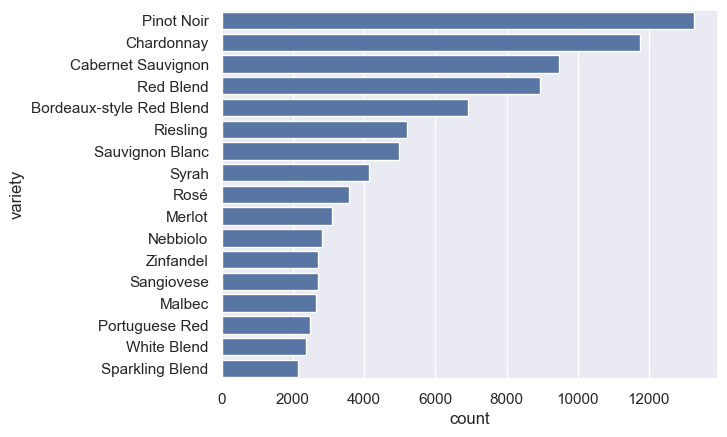

In [23]:
threshold = 2000
top_varieties = reviews.variety.value_counts().sort_values(ascending=False).to_frame().query(f'count > {threshold}')
print(f'the top {len(top_varieties.index)} reviewed varieties have {threshold:,d} or more reviews, and account for {top_varieties['count'].sum():,d} reviews in total.')
sns.barplot(top_varieties, y='variety', x='count', orient='h');

**Verify that the varities are known**

In [24]:
np.array(list(map(to_style,top_varieties.index))), np.array(list(map(to_type,top_varieties.index)))

(array(['light_red', 'full_white', 'full_red', 'medium_red', 'full_red',
        'aromatic_white', 'light_white', 'full_red', 'rose', 'medium_red',
        'full_red', 'medium_red', 'medium_red', 'full_red', 'medium_red',
        'full_white', 'sparkling'], dtype='<U14'),
 array(['red', 'white', 'red', 'red', 'red', 'white', 'white', 'red',
        'rose', 'red', 'red', 'red', 'red', 'red', 'red', 'white',
        'sparkling'], dtype='<U9'))

**Stratified Sampling of Reviews by Variety**

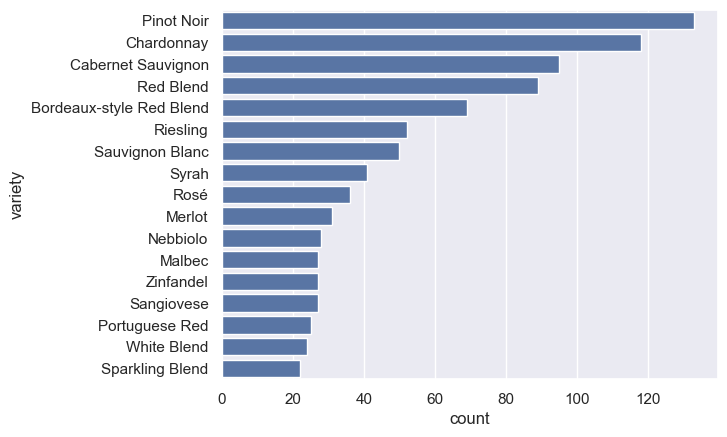

In [25]:
most_reviewed = reviews[reviews.variety.isin(top_varieties.index)][['description', 'variety']].copy()
subset = most_reviewed.groupby('variety')[['description', 'variety']].apply(lambda row: row.sample(frac=0.01)).reset_index(drop=True).sample(frac=1)
sns.barplot(subset.variety.value_counts().sort_values(ascending=False).to_frame(), y='variety', x='count', orient='h');

### Data Preparation

**Preprocessing**

In [26]:
corpus = subset.description.astype(str)

In [27]:
y = most_reviewed.variety
y_style = most_reviewed.variety.apply(to_style)
y_type = most_reviewed.variety.apply(to_type)
corpus

52     This wine is dark, concentrated, initially har...
544    Dark berry aromas are calm and oaky. This blen...
584    A fruity, fragrant wine, this has good acidity...
431    The most Burgundian of the '99s from Hartford,...
83     Solid from front to back. The nose is your nor...
                             ...                        
505    A young and fruity wine, full of ripe black cu...
658    Tight and minerally aromas of grapefruit pith,...
532    This blend of 70% Montepulciano and 30% Sangio...
394    This wine combines both the richer, ripe style...
311    Cherry pie, cherry candy and dried ginger note...
Name: description, Length: 894, dtype: object

In [28]:
items = corpus.to_list()
print(type(items), type(items[0]), type(items[1]))
items[:5]

<class 'list'> <class 'str'> <class 'str'>


['This wine is dark, concentrated, initially hard and tannic. Underneath, there is a fresh character from the red berry flavors, sweetness and lively acidity. For medium-term aging over 5–6 years.',
 'Dark berry aromas are calm and oaky. This blend of 60% Merlot and 40% Cabernet Sauvignon feels full and blocky, although bold acidity helps. Minty, oaky flavors of plum, cassis and tomato are salty and spicy, while this runs long on a finish that boasts a ripe-fruit base.',
 'A fruity, fragrant wine, this has good acidity and bright flavors of raspberries, plums and loganberries. It is more fruity than structured and should be drunk now.',
 "The most Burgundian of the '99s from Hartford, this cool-climate single-vineyard wine smells of leather, clove, even slightly of barnyard. Some green herbaceousness on the palate balances bright cherry fruit—the interplay of elements gives this wine a multifaceted character that changes from sip to sip. Give it 2–3 years for the tannins to smooth out.

**Tokenization & Normalization Helper**

In [29]:
import string
import nltk
nltk.download('all')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

swords = stopwords.words('english')

def clean_review(description, swords=swords) -> str:
  try:
    # data preparation helper
    # tokenize: convert text to tokens
    tokens = word_tokenize(description)
    
    #
    # normalization
    #

    # part-of-speech tagging
    token_pos = nltk.pos_tag(tokens)

    # named entity recognition
    named_entities = []
    for t in nltk.ne_chunk(token_pos):
        if hasattr(t,'label'):
            e_name = ' '.join(c[0] for c in t.leaves());
            e_type = t.label()
            named_entities.append((e_name, e_type))
    
    # remove named entities
    for ne in named_entities:
      if ne[1]=='PERSON' or ne[1] == 'PROPN':
        for name in nltk.word_tokenize(ne[0]):
          if len(tokens) > 0:
            tokens.remove(name)

    stemmer = PorterStemmer()
    # to canonical word form
    return ' '.join(list(map(stemmer.stem,map(
                # convert to lower case
                lambda word: word.lower(),
                filter(
                    # remove punctuation
                    lambda word: word not in string.punctuation,
                    # remove stop words
                    filter(lambda word: word not in swords, tokens)
                  )
              ))))
  except Exception as e:
    print(e)
    return ''

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]  

**Spotcheck the preprocess method**

In [30]:
description = corpus.sample(1, random_state=42).values[0]
print(type(description))
print(description)
res = clean_review(description)
print(type(res))
res

<class 'str'>
An appealing nose of mint, herbs and citrus is followed by ripe, mouthwatering flavors of juicy fruit and lemon zest. Taut and clean, with a spicy finish. Pair with Thai food or oysters.
<class 'str'>


'an appeal nose mint herb citru follow ripe mouthwat flavor juici fruit lemon zest clean spici finish thai food oyster'

In [31]:
description = corpus.to_list()[2]
print(description)
clean_review(description)

A fruity, fragrant wine, this has good acidity and bright flavors of raspberries, plums and loganberries. It is more fruity than structured and should be drunk now.


'a fruiti fragrant wine good acid bright flavor raspberri plum loganberri it fruiti structur drunk'

In [32]:
corpus[corpus.str.contains('&')]

161    Another in the new N&N; line, the Sullenger fe...
Name: description, dtype: object

**Parallel Processing of Wine Review Descriptions**

In [ ]:
from time import perf_counter

t = []

def timeit(label, func):
  start = perf_counter()
  r = func()
  t.append(  )
  return r

**No Parallelization**

In [34]:
import time
timeit('pandas.apply', lambda: corpus.apply(clean_review))

52     thi wine dark concentr initi hard tannic under...
544    dark berri aroma calm oaki thi blend 60 40 fee...
584    a fruiti fragrant wine good acid bright flavor...
431    the burgundian '99 hartford cool-clim single-v...
83     solid front back the nose normal mix cassi bla...
                             ...                        
505    a young fruiti wine full ripe black currant fr...
658    tight miner aroma grapefruit pith crush white ...
532    thi blend 70 30 sangioves open note prune rais...
394    thi wine combin richer ripe style underrip her...
311    cherri pie cherri candi dri ginger note conver...
Name: description, Length: 894, dtype: object

**Joblib**

In [35]:
from joblib import Parallel, delayed

timeit('joblib', lambda: pd.Series(Parallel(n_jobs=4, verbose=0)(delayed(clean_review)(description, swords.copy()) for description in corpus.to_list())))

0      thi wine dark concentr initi hard tannic under...
1      dark berri aroma calm oaki thi blend 60 40 fee...
2      a fruiti fragrant wine good acid bright flavor...
3      the burgundian '99 hartford cool-clim single-v...
4      solid front back the nose normal mix cassi bla...
                             ...                        
889    a young fruiti wine full ripe black currant fr...
890    tight miner aroma grapefruit pith crush white ...
891    thi blend 70 30 sangioves open note prune rais...
892    thi wine combin richer ripe style underrip her...
893    cherri pie cherri candi dri ginger note conver...
Length: 894, dtype: object

**Swifter**

In [36]:
import swifter
timeit('swifter', lambda: corpus.swifter.apply(clean_review))

Pandas Apply:   0%|          | 0/894 [00:00<?, ?it/s]

52     thi wine dark concentr initi hard tannic under...
544    dark berri aroma calm oaki thi blend 60 40 fee...
584    a fruiti fragrant wine good acid bright flavor...
431    the burgundian '99 hartford cool-clim single-v...
83     solid front back the nose normal mix cassi bla...
                             ...                        
505    a young fruiti wine full ripe black currant fr...
658    tight miner aroma grapefruit pith crush white ...
532    thi blend 70 30 sangioves open note prune rais...
394    thi wine combin richer ripe style underrip her...
311    cherri pie cherri candi dri ginger note conver...
Name: description, Length: 894, dtype: object

**mapply**

In [37]:
import mapply

mapply.init(
    n_workers=4,
    chunk_size=16,
    max_chunks_per_worker=0,
    progressbar=True
)

timeit('mapply', lambda: corpus.mapply(clean_review))

  0%|          | 0/55 [00:00<?, ?it/s]

52     thi wine dark concentr initi hard tannic under...
544    dark berri aroma calm oaki thi blend 60 40 fee...
584    a fruiti fragrant wine good acid bright flavor...
431    the burgundian '99 hartford cool-clim single-v...
83     solid front back the nose normal mix cassi bla...
                             ...                        
505    a young fruiti wine full ripe black currant fr...
658    tight miner aroma grapefruit pith crush white ...
532    thi blend 70 30 sangioves open note prune rais...
394    thi wine combin richer ripe style underrip her...
311    cherri pie cherri candi dri ginger note conver...
Name: description, Length: 894, dtype: object

**Dask**

In [38]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60326,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:60339,Total threads: 4
Dashboard: http://127.0.0.1:60342/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:60329,


In [39]:
from dask.dataframe import from_pandas
ddf = from_pandas(corpus, npartitions=4, sort=False)
timeit('dask', lambda: ddf.apply(clean_review, meta=('description', 'object')).compute())

52     thi wine dark concentr initi hard tannic under...
544    dark berri aroma calm oaki thi blend 60 40 fee...
584    a fruiti fragrant wine good acid bright flavor...
431    the burgundian '99 hartford cool-clim single-v...
83     solid front back the nose normal mix cassi bla...
                             ...                        
505    a young fruiti wine full ripe black currant fr...
658    tight miner aroma grapefruit pith crush white ...
532    thi blend 70 30 sangioves open note prune rais...
394    thi wine combin richer ripe style underrip her...
311    cherri pie cherri candi dri ginger note conver...
Name: description, Length: 894, dtype: object

In [57]:
timing = pd.DataFrame(t, columns=['library','time (s)'])
timing['process'] = np.where(timing.library == 'pandas.apply', 'single threaded', 'parallel')
timing = timing.sort_values(['process', 'time (s)'], ascending=[False, False])

<Axes: xlabel='time (s)', ylabel='library'>

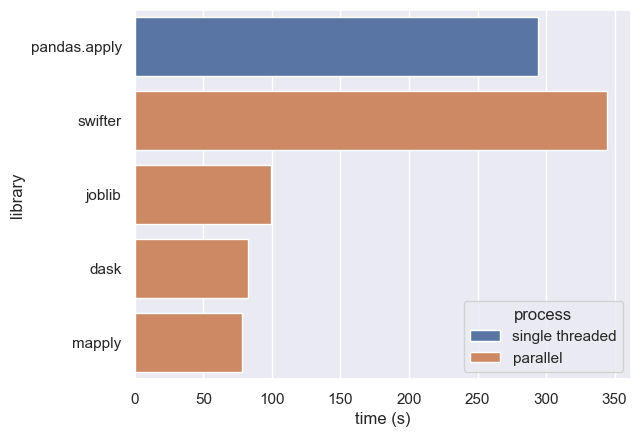

In [58]:
sns.barplot(timing, x='time (s)', y='library', hue='process')

In [41]:
raise NotImplemented()

TypeError: 'NotImplementedType' object is not callable

**Try it out**

In [ ]:
from IPython.display import Markdown, display, Image

description = reviews.description.sample(1, random_state=42).values[0]
display(Markdown(description))
clean_review(description)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(preprocessor=clean_review, lowercase=False)
vectorizer


In [ ]:
X = vectorizer.fit_transform(corpus)
X.shape

In [ ]:
vectorizer.get_feature_names_out()

**Performance Comparison of Tokenization & Normalization Techniques**

**Parallelizing the Tokenization and Normalization**

### KMeans Clustering

In [ ]:
import multiprocessing
from multiprocessing.pool import ThreadPool as Pool
from threading import Lock

X5 = Pool().map(clean_review, corpus.to_list(), chunksize=1024)
X5

In [ ]:
from tokenizers import Tokenizer, models, normalizers, pre_tokenizers, decoders, trainers

tokenizer = Tokenizer(models.Unigram())
tokenizer.normalizer = normalizers.NFKC()
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()
tokenizer.decoders = decoders.ByteLevel()

trainer = trainers.UnigramTrainer(
    vocab_size=20000,
    initial_alphabet=pre_tokenizers.ByteLevel.alphabet(),
    special_tokens=["<PAD>", "<BOS>", "<EOS>"],
)

In [ ]:
tokenizer.train_from_iterator(corpus, trainer=trainer)

In [ ]:
tokenizer.

### Agglomerative Clustering